In [2]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CyTOF

In [3]:
gating_dir_cytof = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\CyTOF' 

### CD4

In [4]:
populations_CD4 = ['03_cluster_C7_hull', '02_cluster_C8_hull','05_cluster_C7_hull', '06_cluster_C8_hull','10_cluster_C7_hull', '11_cluster_C8_hull']
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for cluster in populations_CD4:
    perf_loc = os.path.join(gating_dir_cytof, cluster,cluster[3:-5],'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CyTOF'

df_summary['panel'] = ['full','full','CITEseq','CITEseq','FACS','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[11:-5])

df_summary_cytof_CD4 = df_summary.copy()
#df_summary_cytof_CD4.to_csv('F7_01_df_summary_cytof_CD4')

### CD8

In [5]:
populations_CD8 = ['03_cluster_C25_hull', '02_cluster_C26_hull','05_cluster_C25_hull', '06_cluster_C26_hull','10_cluster_C25_hull', '11_cluster_C26_hull']
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for cluster in populations_CD8:
    perf_loc = os.path.join(gating_dir_cytof, cluster,cluster[3:-5],'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CyTOF'

df_summary['panel'] = ['full','full','CITEseq','CITEseq','FACS','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[11:-5])

df_summary_cytof_CD8 = df_summary.copy()
#df_summary_cytof_CD8.to_csv('F7_01_df_summary_cytof_CD8')

# CITEseq

In [6]:
gating_dir_citeseq = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\CITEseq\\04_run_gating_hull' 

folders = ['04_run_gating_denoised_FACS_panel_hull','04_run_gating_denoised_hull','04_run_gating_joint_panel_hull']

### CD4

In [7]:
cluster = 'cluster_CD16+ CD4+ T cell'
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for folder in folders:
    perf_loc = os.path.join(gating_dir_citeseq, folder,cluster,'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CITEseq'

df_summary['panel'] = ['full','CyTOF','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[14:])

df_summary_citeseq_CD4 = df_summary.copy()
#df_summary_citeseq_CD4.to_csv('F7_01_df_summary_citeseq_CD4')

### CD8

In [8]:
cluster = 'cluster_CD16+ CD8+ T cell'
cluster_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for folder in folders:
    perf_loc = os.path.join(gating_dir_citeseq, folder,cluster,'performance.csv')
    f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
    #dp_list.append(dp)
    cluster_list.append(cluster)
    f1_list.append(f1)
    recall_list.append(recall)
    precision_list.append(precision)
    hierarchy_list.append(hierarchy)

data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'cluster' : cluster_list}
df_summary =pd.DataFrame(data)
df_summary['modality'] = 'CITEseq'

df_summary['panel'] = ['full','CyTOF','FACS']

df_summary['cluster_short'] = df_summary['cluster'].apply(lambda x: x[14:])

df_summary_citeseq_CD8 = df_summary.copy()

#df_summary_citeseq_CD8.to_csv('F7_01_df_summary_citeseq_CD8')

# FACS

In [9]:
def get_f1_hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

In [10]:
gating_dir_FACS_CD4_full = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\FACS\\fig7_full\\full\\cluster_CD16+ CD4+ T cell' 

In [11]:
gating_dir_FACS_CD4_full = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\FACS\\fig7_full\\full\\cluster_CD16+ CD4+ T cell' 
gating_dir_FACS_CD8_full = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\FACS\\fig7_full\\full\\cluster_CD16+ CD8+ T cell' 
f1_FACS_CD4_full,recall_FACS_CD4_full,precision_FACS_CD4_full,hierarchy_FACS_CD4_full = get_f1_hierarch(os.path.join(gating_dir_FACS_CD4_full,'performance.csv'))
f1_FACS_CD8_full,recall_FACS_CD8_full,precision_FACS_CD8_full,hierarchy_FACS_CD8_full = get_f1_hierarch(os.path.join(gating_dir_FACS_CD8_full,'performance.csv'))

In [12]:
df_FACS_CD4_full = pd.DataFrame([[f1_FACS_CD4_full,recall_FACS_CD4_full,precision_FACS_CD4_full,'CD16+ CD4+ T cell','FACS','full','CD4+ T cell']],columns = ['f1', 'recall', 'precision', 'cluster', 'modality', 'panel',
       'cluster_short'])

df_FACS_CD8_full = pd.DataFrame([[f1_FACS_CD8_full,recall_FACS_CD8_full,precision_FACS_CD8_full,'CD16+ CD8+ T cell','FACS','full','CD8+ T cell']],columns = ['f1', 'recall', 'precision', 'cluster', 'modality', 'panel',
       'cluster_short'])

In [13]:
gating_dir_FACS_CD4_reduced = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\FACS\\fig7_reduced\\reduced\\cluster_CD16+ CD4+ T cell' 
gating_dir_FACS_CD8_reduced = 'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility\\Figure_7\\FACS\\fig7_reduced\\reduced\\cluster_CD16+ CD8+ T cell' 
f1_FACS_CD4_reduced,recall_FACS_CD4_reduced,precision_FACS_CD4_reduced,hierarchy_FACS_CD4_reduced = get_f1_hierarch(os.path.join(gating_dir_FACS_CD4_reduced,'performance.csv'))
f1_FACS_CD8_reduced,recall_FACS_CD8_reduced,precision_FACS_CD8_reduced,hierarchy_FACS_CD8_reduced = get_f1_hierarch(os.path.join(gating_dir_FACS_CD8_reduced,'performance.csv'))

df_FACS_CD4_reduced = pd.DataFrame([[f1_FACS_CD4_reduced,recall_FACS_CD4_reduced,precision_FACS_CD4_reduced,'CD16+ CD4+ T cell','FACS','reduced','CD4+ T cell']],columns = ['f1', 'recall', 'precision', 'cluster', 'modality', 'panel',
       'cluster_short'])

df_FACS_CD8_reduced = pd.DataFrame([[f1_FACS_CD8_reduced,recall_FACS_CD8_reduced,precision_FACS_CD8_reduced,'CD16+ CD8+ T cell','FACS','reduced','CD8+ T cell']],columns = ['f1', 'recall', 'precision', 'cluster', 'modality', 'panel',
       'cluster_short'])

In [14]:
df_FACS_CD4 = df_FACS_CD4_full.append(df_FACS_CD4_reduced)

df_FACS_CD8 = df_FACS_CD8_full.append(df_FACS_CD8_reduced)

## summary CD4

In [15]:
df_CD4 = df_summary_cytof_CD4.append(df_summary_citeseq_CD4)
df_CD4 = df_CD4.append(df_FACS_CD4)
#df_CD4['cluster'] = df_CD4['cluster'] + '_' + df_CD4['panel']
df_CD4['ID'] = df_CD4['cluster_short'] + '_' + df_CD4['modality'] + '_' + df_CD4['panel']
df_CD4_melted = pd.melt(df_CD4[['f1','recall','precision','ID']], id_vars="ID", var_name="metric", value_name="score")

In [16]:
df_CD4

,f1,recall,precision,cluster,modality,panel,cluster_short,ID
0,0.668274,0.665280,0.671295,03_cluster_C7_hull,CyTOF,full,C7,C7_CyTOF_full
1,0.551310,0.441627,0.733479,02_cluster_C8_hull,CyTOF,full,C8,C8_CyTOF_full
2,0.675165,0.703360,0.649144,05_cluster_C7_hull,CyTOF,CITEseq,C7,C7_CyTOF_CITEseq
3,0.678658,0.610407,0.764094,06_cluster_C8_hull,CyTOF,CITEseq,C8,C8_CyTOF_CITEseq
4,0.207851,0.675200,0.122832,10_cluster_C7_hull,CyTOF,FACS,C7,C7_CyTOF_FACS
5,0.600423,0.558811,0.648731,11_cluster_C8_hull,CyTOF,FACS,C8,C8_CyTOF_FACS
0,0.831340,0.717975,0.987216,cluster_CD16+ CD4+ T cell,CITEseq,full,CD4+ T cell,CD4+ T cell_CITEseq_full
1,0.836105,0.727273,0.983240,cluster_CD16+ CD4+ T cell,CITEseq,CyTOF,CD4+ T cell,CD4+ T cell_CITEseq_CyTOF
2,0.816765,0.785124,0.851064,cluster_CD16+ CD4+ T cell,CITEseq,FACS,CD4+ T cell,CD4+ T cell_CITEseq_FACS
0,0.746269,0.600000,0.986842,CD16+ CD4+ T cell,FACS,full,CD4+ T cell,CD4+ T cell_FACS_full


In [17]:
palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order = ['C7_CyTOF_full','C7_CyTOF_CITEseq','C7_CyTOF_FACS',
         'C8_CyTOF_full','C8_CyTOF_CITEseq','C8_CyTOF_FACS',
         'CD4+ T cell_CITEseq_full','CD4+ T cell_CITEseq_CyTOF','CD4+ T cell_CITEseq_FACS',
         'CD4+ T cell_FACS_full','CD4+ T cell_FACS_reduced']

<Figure size 640x480 with 0 Axes>

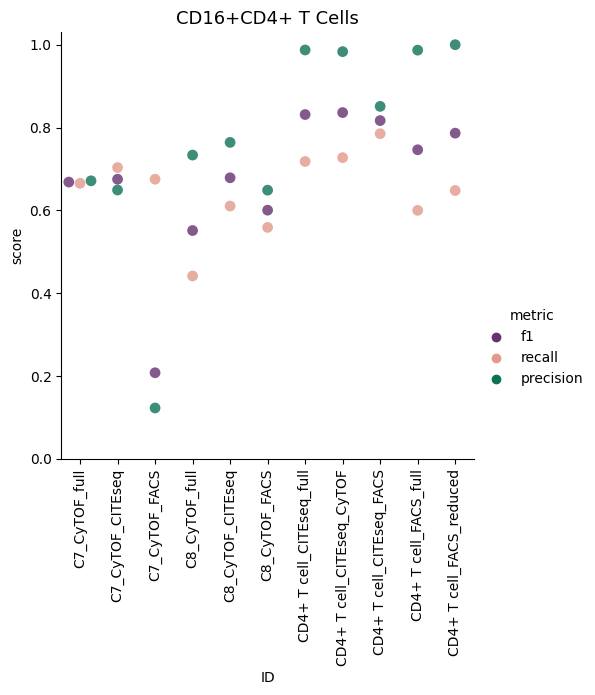

In [18]:
plt.figure()
sns.catplot(x='ID', y="score", hue="metric", data=df_CD4_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.xticks(rotation=90)
plt.title('CD16+CD4+ T Cells',fontsize =13)
plt.savefig('F7_01_CD16CD4_T_cells_summary.pdf',bbox_inches='tight')
#plt.close()

# summary CD8

In [19]:
df_CD8 = df_summary_cytof_CD8.append(df_summary_citeseq_CD8)
df_CD8 = df_CD8.append(df_FACS_CD8)
#df_CD8['cluster'] = df_CD8['cluster'] + '_' + df_CD8['panel']
df_CD8['ID'] = df_CD8['cluster_short'] + '_' + df_CD8['modality'] + '_' + df_CD8['panel']
df_CD8_melted = pd.melt(df_CD8[['f1','recall','precision','ID']], id_vars="ID", var_name="metric", value_name="score")

In [20]:
palette={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}
order = ['C25_CyTOF_full','C25_CyTOF_CITEseq','C25_CyTOF_FACS',
         'C26_CyTOF_full','C26_CyTOF_CITEseq','C26_CyTOF_FACS',
         'CD8+ T cell_CITEseq_full','CD8+ T cell_CITEseq_CyTOF','CD8+ T cell_CITEseq_FACS',
         'CD8+ T cell_FACS_full','CD8+ T cell_FACS_reduced']

<Figure size 640x480 with 0 Axes>

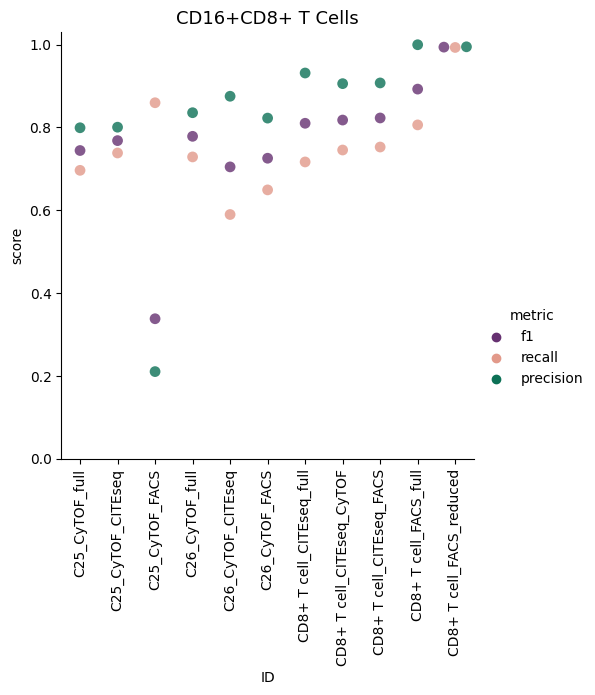

In [21]:
plt.figure()
sns.catplot(x='ID', y="score", hue="metric", data=df_CD8_melted,s=60, kind='swarm',palette=palette,order = order,height = 5,alpha = 0.8)
plt.ylim([0,1.03])
plt.xticks(rotation=90)
plt.title('CD16+CD8+ T Cells',fontsize =13)
plt.savefig('F7_01_CD16CD8_T_cells_summary.pdf',bbox_inches='tight')